## install dependencies

In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules

prepath = "sample/"

if IN_COLAB:
    !git clone https://github.com/Wzesk/littoral_refine
    !pip install simplification
    !pip install geomdl
    !pip install numpy==1.26.4
    !pip install aquarel
    sys.path.append('/content/littoral_refine')
    # adjust path for colab
    prepath = "/content/littoral_refine/sample/"
else:
    print("not running in google colab, create a conda env using:  'conda env create -f environment.yml'")
    import matplotlib.pyplot as plt
    import numpy as np

not running in google colab, create a conda env using:  'conda env create -f environment.yml'


In [2]:
if IN_COLAB:
  from littoral_refine import extract_boundary, refine_boundary
else:
  #assuming notebook is running in same folder as dependencies
  import extract_boundary 
  import refine_boundary

## refine shoreline example

extract shoreline input

In [3]:
#load an image from the folder
mask_filepath = prepath + '20241211T052119_20241211T052515_T43NCE_mask.png'
img_path =      prepath + '20241211T052119_20241211T052515_T43NCE_sr.png'

extract an intial boundary (along with a buffer used for some of the refinement options).
I am thinking this will move into the refine shoreline class...

In [4]:
shoreline, buffer, shoreline_filepath = extract_boundary.get_shoreline(mask_filepath,simplification=0.5,smoothing=2)

refine shoreline inputs

In [5]:
boundary_path = prepath + '20241211T052119_20241211T052515_T43NCE_mask_sl.csv'

### refine shoreline - slope

initialize refiner

In [6]:
refiner = refine_boundary.boundary_refine(boundary_path, img_path)

run the shore-normal refinement (one type of refinement) and visualize the results

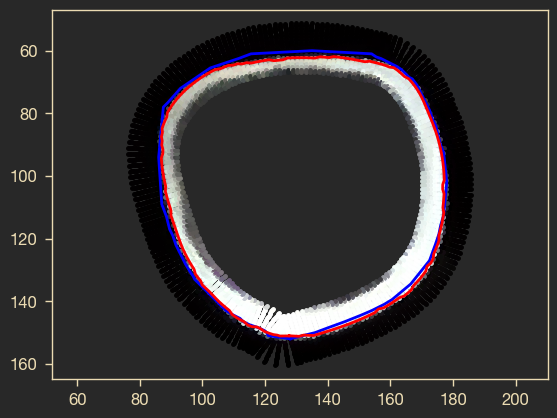

In [7]:
refiner.normal_thresholding()
refiner.visualize_results(draw_image=False,draw_sampling=True)

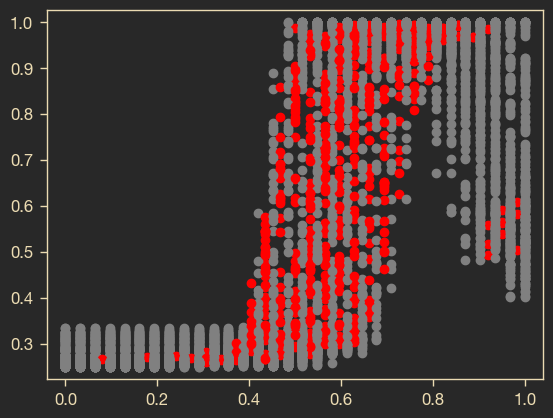

In [8]:
refiner.visualize_max_slopes()

visualize results

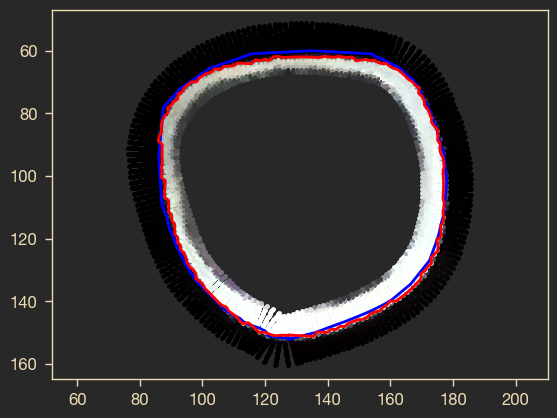

In [9]:
refiner.kmeans_thresholding()
refiner.visualize_results(draw_image=False,draw_sampling=True)

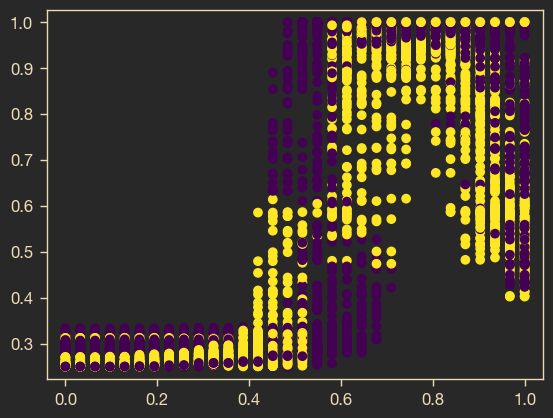

In [10]:
refiner.visualize_clusters()

## coastsat threshold

In [11]:
from PIL import Image
import extract_boundary 
import refine_boundary
import numpy as np
import matplotlib.pyplot as plt

In [12]:
img_path = '/Users/wzesk/Documents/git_repos/littoral_pipeline_project/littoral_refine/sample/periodic/20240116T052149_20240116T053608_T43NBF_rgb_up.png'
nir_path = '/Users/wzesk/Documents/git_repos/littoral_pipeline_project/littoral_refine/sample/periodic/20240116T052149_20240116T053608_T43NBF_nir_up.png'
mask_path = '/Users/wzesk/Documents/git_repos/littoral_pipeline_project/littoral_refine/sample/periodic/20240116T052149_20240116T053608_T43NBF_nir_mask.png'
buffer_path = '/Users/wzesk/Documents/git_repos/littoral_pipeline_project/littoral_refine/sample/periodic/20240116T052149_20240116T053608_T43NBF_nir_buffer.png'
#setup inputs
im_ms = np.array(Image.open(img_path))
nir = np.array(Image.open(nir_path))

im_labels = (np.array(Image.open(mask_path))/255).astype(np.uint8)

im_ref_buffer = np.array(Image.open(buffer_path))

im_ms.shape, nir.shape, im_labels.shape, im_ref_buffer.shape

((200, 188, 3), (200, 188, 3), (200, 188), (200, 188))

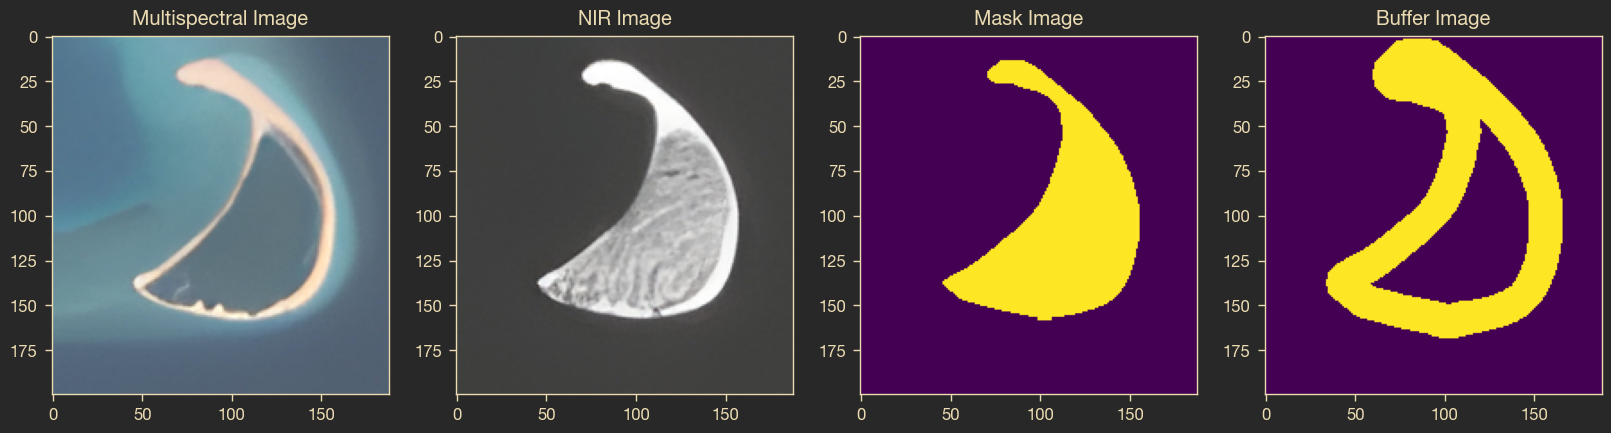

In [13]:
#visualize the arrays as images
fig, ax = plt.subplots(1,4, figsize=(20,10))
ax[0].imshow(im_ms)
ax[0].set_title('Multispectral Image')
ax[1].imshow(nir)
ax[1].set_title('NIR Image')
ax[2].imshow(im_labels/np.max(im_labels).astype(int))
ax[2].set_title('Mask Image')
ax[3].imshow(im_ref_buffer)
ax[3].set_title('Buffer Image')
plt.show()

In [14]:
contours_wi, t_wi,lens = refine_boundary.find_wl_contours2(im_ms, nir, im_labels, im_ref_buffer)

In [15]:
len(contours_wi)

32

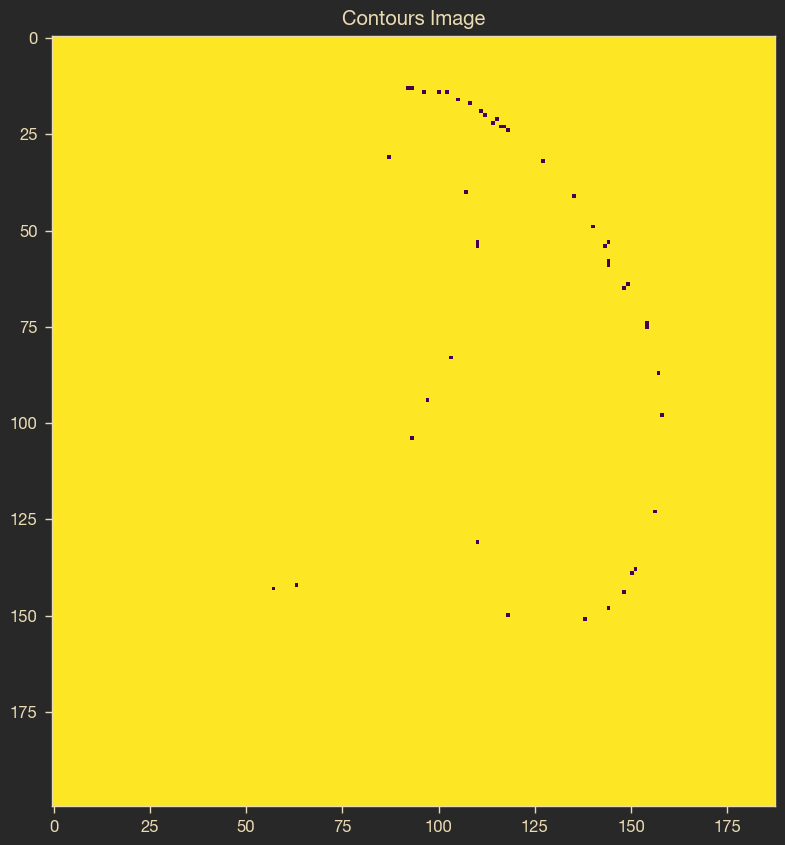

In [16]:
# plot the countours on top of the lens
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.imshow(lens)
for i in range(len(contours_wi)):
    for j in range(len(contours_wi[i])):
        ax.plot(contours_wi[i][j][1], contours_wi[i][j][0], 'r')

ax.set_title('Contours Image')
plt.show()

In [17]:
contours_wi, t_wi,lens

([array([[13.        , 93.00195312],
         [12.99804688, 93.        ],
         [12.99804688, 92.        ],
         [13.        , 91.99804688],
         [13.00195312, 92.        ],
         [13.00195312, 93.        ],
         [13.        , 93.00195312]]),
  array([[14.        , 96.00195312],
         [13.99804688, 96.        ],
         [14.        , 95.99804688],
         [14.00195312, 96.        ],
         [14.        , 96.00195312]]),
  array([[ 14.        , 100.00195312],
         [ 13.99804688, 100.        ],
         [ 14.        ,  99.99804688],
         [ 14.00195312, 100.        ],
         [ 14.        , 100.00195312]]),
  array([[ 14.        , 102.00195312],
         [ 13.99804688, 102.        ],
         [ 14.        , 101.99804688],
         [ 14.00195312, 102.        ],
         [ 14.        , 102.00195312]]),
  array([[ 16.        , 105.00195312],
         [ 15.99804688, 105.        ],
         [ 16.        , 104.99804688],
         [ 16.00195312, 105.        ],
  